In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

In [28]:
df = pd.read_csv("superheated_vapor_properties.csv")
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2491,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1040,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2873.1000,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.9000,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000


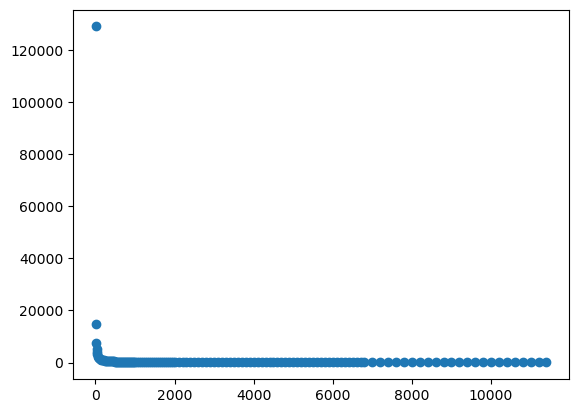

In [29]:



df=df.loc[(df['Property']=='V')]
plt.scatter(df['Pressure'].values,df['Vap_Sat'].values )
plt.show()


In [30]:
def loss(y_hat, y):
    l = abs((y_hat - y) ** 2 / 2)
    return l.mean()

def forward_pass(x,m,c):
    return m*x+c

def gradient_descent(x,y,m,c,learning_rate,N):
   y_hat=forward_pass(x,m,c)
   dm = (2.0/N) * -np.sum(np.multiply(x,(y - y_hat)))
   dc = (2.0/N) * -np.sum((y - y_hat))
   m = m -learning_rate * dm
   c = c - learning_rate * dc
   return m,c

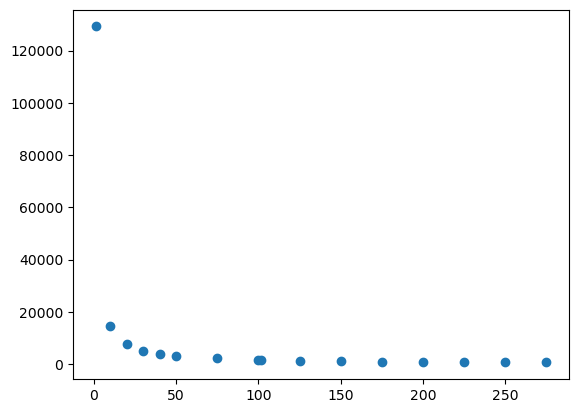

In [31]:
#Plotting pressure < 300 #

df1 = df.loc[(df['Pressure'] < 300)]
x1 = df1['Pressure'].values
y1 = df1['Vap_Sat'].values
plt.scatter(x1,y1)
plt.show()

In [32]:
#Using sklearn#

model1 = LinearRegression()
model1.fit(x1.reshape(x1.shape[0],1),y1.reshape(y1.shape[0],1))
print("Slope of the model is: ", model1.coef_[0])
print("Intercept of the model is: ", model1.intercept_)
print("r2 score of the model is: ", r2_score(y1,model1.coef_[0]*x1+model1.intercept_))

Slope of the model is:  [-145.33343846]
Intercept of the model is:  [27608.03471493]
r2 score of the model is:  0.16815590648253187


In [33]:
#Using scratch#

m1 = np.random.randn(1)
c1 = np.random.randn(1)
learning_rate = 0.00001
num_epochs = 300000
for i in range(num_epochs):
    m1,c1 = gradient_descent(x1,y1,m1,c1,learning_rate,x1.shape[0])
print("Slope of the model is: ", m1)
print("Intercept of the model is: ", c1)
print("r2 score of the model is: ", r2_score(y1,m1*x1+c1))

Slope of the model is:  [-128.21315573]
Intercept of the model is:  [24526.67980618]
r2 score of the model is:  0.16447859726433278


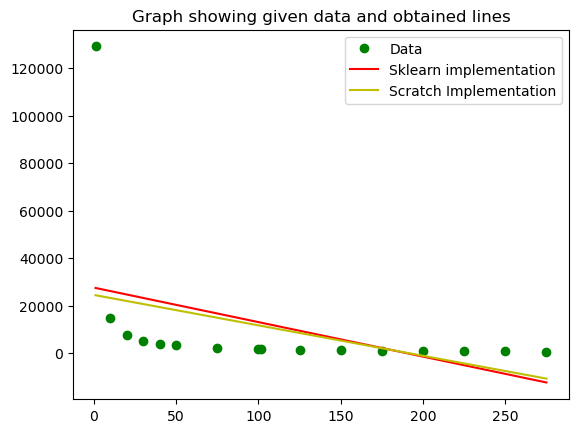

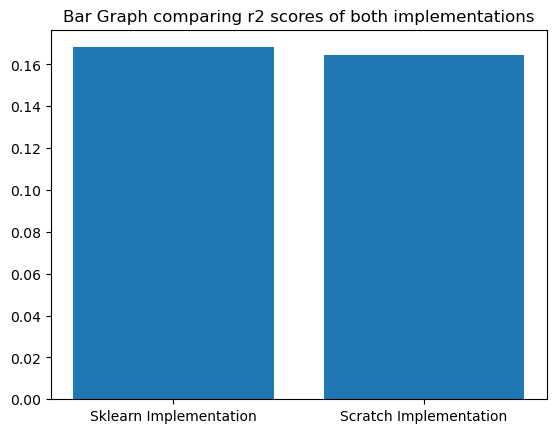

Also note that the time taken for sklearn implementation was much less than scratch implementation.


In [34]:
#Comparison#

plt.plot(x1,y1,'go')
plt.plot(x1,model1.coef_[0]*x1+model1.intercept_,'r-')
plt.plot(x1,m1*x1+c1,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y1,model1.coef_[0]*x1+model1.intercept_),r2_score(y1,m1*x1+c1) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()
print("Also note that the time taken for sklearn implementation was much less than scratch implementation.")

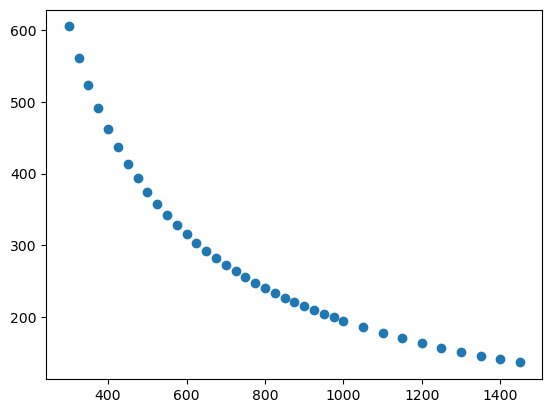

In [35]:
#Repeatingfor pressure[300,1500]#
df2 = df.loc[(df['Pressure'] >= 300) & (df['Pressure'] < 1500)]
x2 = df2['Pressure'].values
y2 = df2['Vap_Sat'].values
plt.scatter(x2,y2)
plt.show()
x2 = x2.reshape(x2.shape[0],1)
y2 = y2.reshape(y2.shape[0],1)
x2_train, x2_test, y2_train, y2_test= train_test_split(x2,y2,test_size=0.2,random_state=2)

In [36]:
model2 = LinearRegression()
model2.fit(x2_train,y2_train)
y2_predicted = model2.predict(x2_test)
print("Slope of the model is: ", model2.coef_[0])
print("Intercept of the model is: ", model2.intercept_)
print("r2 score of the model is: ", r2_score(y2_test, y2_predicted))


Slope of the model is:  [-0.33790614]
Intercept of the model is:  [554.81485668]
r2 score of the model is:  0.7905619304260574


In [39]:
m2 = 0
c2 = 300
learning_rate = 0.000001
num_epochs = 2000000
for i in range(num_epochs):
    m2,c2 = gradient_descent(x2_train.reshape(-1),y2_train.reshape(-1),m2,c2,learning_rate,x2_train.shape[0])
print("Slope of the model is: ", m2)
print("Intercept of the model is: ", c2)
print("r2 score of the model is: ", r2_score(y2_test,m2*x2_test+c2))

Slope of the model is:  -0.1848404716210462
Intercept of the model is:  411.1433207201005
r2 score of the model is:  0.5174191840234251


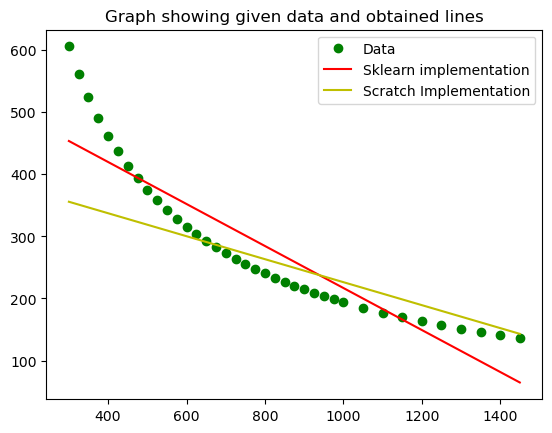

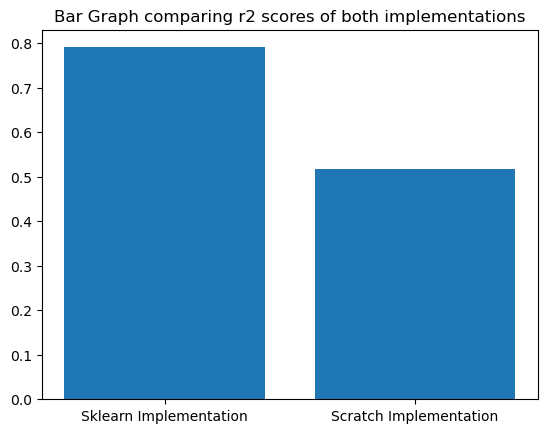

In [40]:
plt.plot(x2,y2,'go')
plt.plot(x2,model2.coef_[0]*x2+model2.intercept_,'r-')
plt.plot(x2,m2*x2+c2,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y2_test, y2_predicted),r2_score(y2_test,m2*x2_test+c2) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()

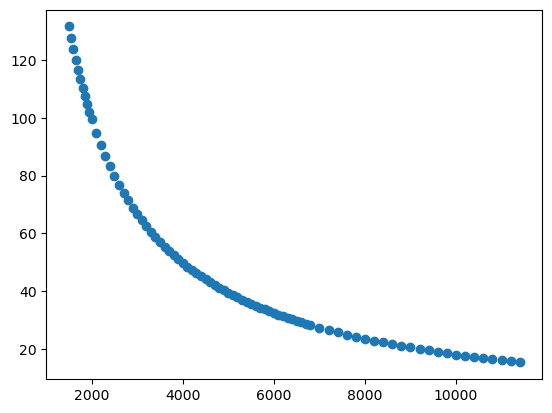

In [41]:
#Repeating for pressure>1500#

df3 = df.loc[(df['Pressure'] >= 1500)]
x3 = df3['Pressure'].values
y3 = df3['Vap_Sat'].values
plt.scatter(x3,y3)
plt.show()

In [42]:
model3 = LinearRegression()
model3.fit(x3.reshape(x3.shape[0],1),y3.reshape(y3.shape[0],1))
print("Slope of the model is: ", model3.coef_[0])
print("Intercept of the model is: ", model3.intercept_)
print("r2 score of the model is: ", r2_score(y3,model3.coef_[0]*x3+model3.intercept_))

Slope of the model is:  [-0.00983263]
Intercept of the model is:  [103.50437059]
r2 score of the model is:  0.7640960509847484


In [43]:
m3 = 0
c3 = 80
learning_rate = 0.00000002
num_epochs = 3000000
for i in range(num_epochs):
    m3,c3 = gradient_descent(x3,y3,m3,c3,learning_rate,x3.shape[0])
print("Slope of the model is: ", m3)
print("Intercept of the model is: ", c3)
print("r2 score of the model is: ", r2_score(y3,m3*x3+c3))

Slope of the model is:  -0.006509314692809743
Intercept of the model is:  80.59516736947127
r2 score of the model is:  0.6530811637085214


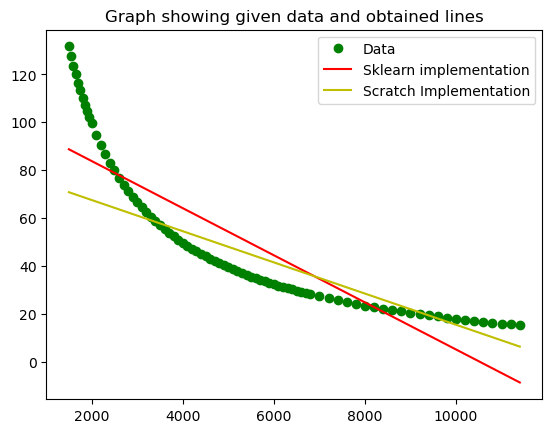

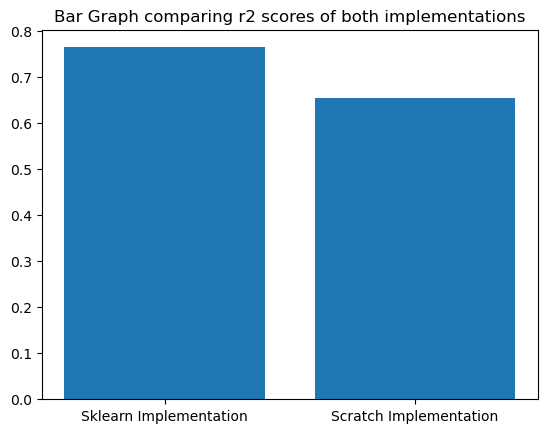

In [44]:
plt.plot(x3,y3,'go')
plt.plot(x3,model3.coef_[0]*x3+model3.intercept_,'r-')
plt.plot(x3,m3*x3+c3,'y-')
plt.legend(['Data','Sklearn implementation','Scratch Implementation'])
plt.title("Graph showing given data and obtained lines")
plt.show()
plt.bar(np.array(["Sklearn Implementation","Scratch Implementation"]), np.array([r2_score(y3,model3.coef_[0]*x3+model3.intercept_),r2_score(y3,m3*x3+c3) ]))
plt.title("Bar Graph comparing r2 scores of both implementations")
plt.show()